# Pre-Modeling: Data Preprocessing and Feature Exploration in Python

## Goals:

* Goal: 
    * Pre-modeling/modeling == 80/20% of work
    * Show the importance of data preprocessing, feature exploration, and feature engineering on model performance
    * Go over a few effective pre-modeling
* Format:
    * Use an edited version of the 'adult' dataset **to predict income** with the objective of building a binary classification model
* Python libraries:
    * Numpy
    * Panda
    * Sci-kit learn
    * Matplotlib
Source of 'adult' dataset: https://archive.ics.uci.edu/ml/datasets/Adult

# Agenda
1. Modeling Overview
2. Introduce the Data
3. Basic Data Cleaning:
*    A. Dealing with data-types
*    B. Handling missing data
4. More Data Exploration:
*    A. Outlier detection
*    B. Plotting distributions
5. Feature Engineering:
*    A. Interactions between features
*    B. Dimensionality reduction using PCA
6. Feature Selection and Model Building

# Part 1: Modeling Overview
## Review of Predictive Modeling
### Definition:
   * Statistical technique to predict unknown outcomes
### Assessing model performance:
   * Randomly split observations (datapoints) into train/test sets
   * Build model on train set and assess performance on test set
   * AUC of ROC is common performance metric (true/false positive rates)
### Types of models for binary classification:
   * Logistic regression
   * Random Forest
   * Gradient Boosted Trees
   * Support Vector Machines
   * etc.

In [84]:
# Part 2: Introduce the Data
import numpy as np
import pandas as pd

df = pd.read_csv('adult.data',na_values=['#NAME?'])
columns = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capitol_loss','hour_per_week','native_country','income']
df.columns = columns

In [2]:
print(df.income.head(100))

0      <=50K
1      <=50K
2      <=50K
3      <=50K
4      <=50K
       ...  
95      >50K
96      >50K
97     <=50K
98     <=50K
99      >50K
Name: income, Length: 100, dtype: object


In [3]:
#Take a look at the outcome variable: 'income'
print(df.columns)
print(df['income'].value_counts())

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capitol_loss', 'hour_per_week', 'native_country',
       'income'],
      dtype='object')
 <=50K    24719
 >50K      7841
Name: income, dtype: int64


In [4]:
#Assign outcome as 0 if income <= 50k and as 1 if income > 50k
# for x in df['income']:
#     if x == '>50K':
#         df[income]=0
#     elif x == '<=50K':
#         df[income]=1
# df['income_1'] = [0 if x == '>50K' elif x == '<=50K' for x in df['income']]

#assign X as a dataframe of features and Y as a Series of the outcome variable
y = df.income
X = df.drop('income',1)


In [5]:
# print(X.head(15))
print(df.income,y)

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32555     <=50K
32556      >50K
32557     <=50K
32558     <=50K
32559      >50K
Name: income, Length: 32560, dtype: object 0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32555     <=50K
32556      >50K
32557     <=50K
32558     <=50K
32559      >50K
Name: income, Length: 32560, dtype: object


In [6]:
incomes = ['>50K','<=50K']
for i,x in enumerate(y):
    if x[1] == '>':
        y[i] = 1
    else:
        y[i] = 0
    
# print(y.head(15))

<ipython-input-6-c615c410e541>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = 0
<ipython-input-6-c615c410e541>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = 1


In [7]:
print(y.head(1000))
print(pd.get_dummies(X['education']).head(5))

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    1
997    0
998    1
999    0
Name: income, Length: 1000, dtype: object
    10th   11th   12th   1st-4th   5th-6th   7th-8th   9th   Assoc-acdm  \
0      0      0      0         0         0         0     0            0   
1      0      0      0         0         0         0     0            0   
2      0      1      0         0         0         0     0            0   
3      0      0      0         0         0         0     0            0   
4      0      0      0         0         0         0     0            0   

    Assoc-voc   Bachelors   Doctorate   HS-grad   Masters   Preschool  \
0           0           1           0         0         0           0   
1           0           0           0         1         0           0   
2           0           0           0         0         0           0   
3           0           1           0         0         0           0   
4           0           0           0      

In [8]:
#Decide which categorical variables you want to use in model
for col_name in X.columns:
    if X[col_name].dtype == 'object':
        unique_cat = len(X[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'workclass' has 9 unique categories
Feature 'education' has 16 unique categories
Feature 'marital_status' has 7 unique categories
Feature 'occupation' has 15 unique categories
Feature 'relationship' has 6 unique categories
Feature 'race' has 5 unique categories
Feature 'sex' has 2 unique categories
Feature 'native_country' has 42 unique categories


In [9]:
#Although, 'native_country' has a lot of unique categories, most categories only have a few observations
print(X['native_country'].value_counts().sort_values(ascending=False).head(10))

 United-States    29169
 Mexico             643
 ?                  583
 Philippines        198
 Germany            137
 Canada             121
 Puerto-Rico        114
 El-Salvador        106
 India              100
 Cuba                95
Name: native_country, dtype: int64


In [10]:
X['native_country'] = ['United-States ' if x != 'United-States' else 'Other' for x in X['native_country']]
print(X['native_country'].value_counts().sort_values(ascending=False))

United-States     32560
Name: native_country, dtype: int64


In [11]:
#function to dummy all the categorical variables used for modeling
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x,1)
        df = pd.concat([df,dummies],axis=1)
    return df


In [12]:
#features to dummy
todummy_list = ['workclass','education','marital_status','occupation','relationship','race','sex','native_country']
X = dummy_df(X,todummy_list)
print(X.head(5))

   age  fnlwgt  education_num  capital_gain  capitol_loss  hour_per_week  \
0   50   83311             13             0             0             13   
1   38  215646              9             0             0             40   
2   53  234721              7             0             0             40   
3   28  338409             13             0             0             40   
4   37  284582             14             0             0             40   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   

   workclass_ Never-worked  ...  relationship_ Unmarried  relationship_ Wife  \
0                        0  ...                        0                

# Handling missing values
* Solutions: Replace missing value with another value (mean, median, highest frequency value of given feature

In [13]:
#check how much data is missing
X.isnull().sum().sort_values(ascending=False).head()

native_country_United-States     0
education_ 11th                  0
education_ Some-college          0
education_ Prof-school           0
education_ Preschool             0
dtype: int64

In [14]:
#impute missing values using Imputer in sklearn.preprocessing
#from sklearn.preprocessing import Imputer
    
#imp = Imputer(missing_values='NaN',strategy='median',axis=0)
#imp.fit(X)
#X = pd.DataFrame(data=imp.transform(X), columns=X.columns)
#X.isnull().sum().sort_values(ascending=False).head()

# Outlier Detection
## Approaches for detecting outliers
* Tukey IQR
**Outliers == values below Q1-1.5(Q3-Q1) or above Q3+1.5(Q3-Q1)
* Kernel Density Estimation
**Bimodel distributions

In [15]:

from IPython.display import Image

In [16]:
#Image(filename='outliers.jpg')
##TUKEY IQR
def find_outliers_tukey(x):
    q1,q3 = np.percentile(x,[25,75])
    iqr=q3-q1
    floor = q1-1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x<floor)|(x>ceiling)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values

In [17]:
tukey_indices, tukey_values = find_outliers_tukey(X['age'])
print(np.sort(tukey_values))

[79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 80 80
 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 81 81 81 81
 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 82 82 82 82 82 82 82 82
 82 82 82 82 83 83 83 83 83 83 84 84 84 84 84 84 84 84 84 84 85 85 85 86
 87 88 88 88 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90
 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90]


In [18]:
#KERNEL DENSITY ESTIMATION
from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate

def find_outliers_kde(x):
    x_scaled = scale(list(map(float,x)))
    kde = KDEUnivariate(x_scaled)
    kde.fit(bw="scott",fft=True)
    pred = kde.evaluate(x_scaled)
    
    n= sum(pred<0.5)
    outlier_ind = np.asarray(pred).argsort()[:n]
    outlier_value = np.asarray(x)[outlier_ind]
    
    return outlier_ind, outlier_value

In [19]:
kde_indices, kde_values = find_outliers_kde(X['age'])
print(np.sort(kde_values))

[17 17 17 ... 90 90 90]


In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_histogram(x):
    plt.hist(x, color='gray',alpha=0.5)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

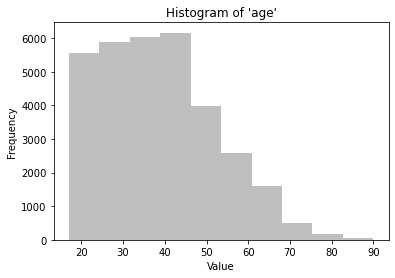

In [21]:
plot_histogram(X['age'])

In [22]:
def plot_histogram_dv(x,y):
    plt.hist(list(x[y==0]),alpha=0.5,label='DV=0')
    plt.hist(list(x[y==1]),alpha=0.5,label='DV=1')
    plt.title("Histogram of '{var_name}' by DV Category".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()

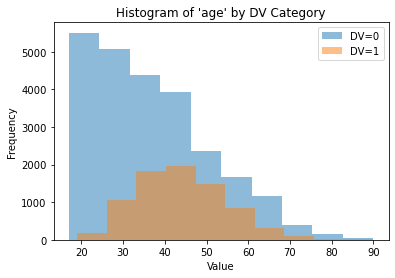

In [23]:
plot_histogram_dv(X['age'],y)

# Feature Engineering
## Interactions amongst features
* A simple two-way interaction is represented by:
**X3=X1*X2, where X3 is the interaction between X1 and X2
* Example: Interaction: education and polititcal ideology; outcome: concerns about climate change
* While an increase in education amongst liberals or moderates increases concerns about climate change, an increase in education amongst conservatives has the opposite effect
* The education-political ideology interaction captures more than the two features alone
## Note that the interactions amongst dummy variables == 0
## Recommend understanding your data and domain if possible and selectively choosing interactions

In [24]:
#Use PolynomialFeatures in sklearn.preprocessing to create two-way interactions for all features
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
    #get feature names
    combos = list(combinations(list(df.columns),2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
    #Find interactions
    poly = PolynomialFeatures(interaction_only=True,include_bias=False)
    df= poly.fit_transform(X)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    #Remove interaction terms wth all 0 values
    noint_indicies = [i for i,x in enumerate(list((df==0).all())) if x]
    df = df.drop(df.columns[noint_indicies],axis=1)
    return df

In [25]:
X = add_interactions(X)
print(X.head(5))

    age    fnlwgt  education_num  capital_gain  capitol_loss  hour_per_week  \
0  50.0   83311.0           13.0           0.0           0.0           13.0   
1  38.0  215646.0            9.0           0.0           0.0           40.0   
2  53.0  234721.0            7.0           0.0           0.0           40.0   
3  28.0  338409.0           13.0           0.0           0.0           40.0   
4  37.0  284582.0           14.0           0.0           0.0           40.0   

   workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0           0.0                     0.0                   0.0   
1           0.0                     0.0                   0.0   
2           0.0                     0.0                   0.0   
3           0.0                     0.0                   0.0   
4           0.0                     0.0                   0.0   

   workclass_ Never-worked  ...  race_ Black_sex_ Male  \
0                      0.0  ...                    0.0   
1                 

# Part 5: Dimensionality Reduction using PCA
## PCA - a technique that transforms a dataset of many features into principal components that summarize the variance that underlies the data


In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pd.DataFrame(pca.fit_transform(X))

In [27]:
print(X_pca.head(5))

              0             1             2             3             4  \
0 -2.048345e+08 -1.645470e+07 -6.698469e+06  2.217419e+06  3.097192e+05   
1 -2.048308e+08 -1.638103e+07  1.614904e+06  6.847753e+04 -1.633792e+05   
2 -2.048293e+08 -1.635042e+07  4.971081e+06  2.694655e+06 -9.023417e+05   
3 -2.048286e+08 -1.633816e+07  6.411824e+06 -2.375597e+06  1.529167e+06   
4 -2.048290e+08 -1.634583e+07  5.492804e+06 -1.324751e+05  1.307591e+06   

              5              6              7              8              9  
0  31958.738721 -142111.150862   43503.319724  -43564.328577   16365.440785  
1  15800.354299   96151.201698 -117072.128919  -71807.674410  165730.575092  
2  13262.633035 -131078.937579  -39245.519010   23912.663876    4745.220356  
3 -46315.076597   10927.100543  402922.190065  271293.865587  102186.585626  
4 -35049.741334    2154.071754  245039.327456  259047.634189  -50929.377887  


# Part 6: Feature Selection and Model Building

In [36]:
#to split data into train and test sets
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = .75,random_state=1)

In [37]:
print(df.shape, X.shape)


(32560, 15) (32560, 1799)


In [54]:
import sklearn.feature_selection 

#try k = [1,2,4,8,16,32] => 16 is best
select = sklearn.feature_selection.SelectKBest(k=16)

selected_features = select.fit(X_train,y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

C:\Users\Bao Tran\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [  66  483  577  741  787  792  794  800  804  930 1128 1166 1388 1390] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\Bao Tran\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [62]:
print(X_train_selected.shape,X_test_selected.shape)
colnames_selected

(24420, 16) (8140, 16)


['marital_status_ Married-civ-spouse',
 'relationship_ Husband',
 'age_education_num',
 'age_marital_status_ Married-civ-spouse',
 'age_relationship_ Husband',
 'education_num_marital_status_ Married-civ-spouse',
 'education_num_relationship_ Husband',
 'hour_per_week_marital_status_ Married-civ-spouse',
 'hour_per_week_relationship_ Husband',
 'marital_status_ Married-civ-spouse_relationship_ Husband',
 'marital_status_ Married-civ-spouse_race_ White',
 'marital_status_ Married-civ-spouse_sex_ Male',
 'marital_status_ Married-civ-spouse_native_country_United-States ',
 'relationship_ Husband_race_ White',
 'relationship_ Husband_sex_ Male',
 'relationship_ Husband_native_country_United-States ']

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

def find_model_perf(X_train, y_train, X_test, y_test):
    y_train=y_train.astype('int')
    y_test=y_test.astype('int')
    model=LogisticRegression()
    model.fit(X_train,y_train)
    y_hat = [x[1] for x in model.predict_proba(X_test)]
    auc = roc_auc_score(y_test,y_hat)
    
    return auc

In [63]:

auc_processed = find_model_perf(X_train_selected,y_train,X_test_selected,y_test)

print(auc_processed)


0.8623474421046137


C:\Users\Bao Tran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Build model using unprocessed data

In [94]:
#Drop missing values so model does not throw any error

df_unprocessed = df
df_unprocessed = df_unprocessed.dropna(axis=0, how='any')
print(df.shape)
print(df_unprocessed.shape)

(32560, 15)
(32560, 15)


In [99]:
#Remove non-numeric columns so model does not throw any error
for col_name in df_unprocessed.columns:
    if df_unprocessed[col_name].dtypes not in ['int32','int64','float32','float64']:
        df_unprocessed = df_unprocessed.drop(col_name,1)

In [101]:
#split into features and outcomes
X_unprocessed = df_unprocessed#.drop('income',1)
y_unprocessed = y

In [102]:
print(X_unprocessed.head(5))

   age  fnlwgt  education_num  capital_gain  capitol_loss  hour_per_week
0   50   83311             13             0             0             13
1   38  215646              9             0             0             40
2   53  234721              7             0             0             40
3   28  338409             13             0             0             40
4   37  284582             14             0             0             40


In [103]:
X_train_unprocessed, X_test_unprocessed, y_train, y_test = train_test_split(X_unprocessed,y_unprocessed,train_size = .75,random_state=1)

In [104]:
auc_unprocessed = find_model_perf(X_train_unprocessed, y_train, X_test_unprocessed, y_test)
print(auc_unprocessed)

0.5764406461668232


In [105]:
print('AUC of model with data preprocessing: {auc}'.format(auc=auc_processed))
print('AUC of model without data preprocessing: {auc}'.format(auc=auc_unprocessed))
per_improve = ((auc_processed-auc_unprocessed)/auc_unprocessed)*100
print('Model improvement of preprocessing: {per_improve}%'.format(per_improve = per_improve))

AUC of model with data preprocessing: 0.8623474421046137
AUC of model without data preprocessing: 0.5764406461668232
Model improvement of preprocessing: 49.59865301640238%
